In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Specify the directory you want to iterate over
directory = './Output/Arnold_tongues_15052024/arnold_tongue_200x200/'

# Use os.listdir to get all files in the directory
files = os.listdir(directory)

simulation_lists = []
# Iterate over all files
for file in files:
    # Full file path
    file_path = os.path.join(directory, file)
    #print(file_path)
    with open(file_path, 'rb') as f:
        # Load the data from the file
        simulations = pickle.load(f)
        simulation_lists = simulation_lists + simulations

EOFError: Ran out of input

In [3]:
num_partitions = 200
simulation_lists = []
for i in np.arange(0,num_partitions):
    with open(f"./Output/Arnold_tongues_15052024/arnold_tongue_200x200/partition_{i}.pkl", 'rb') as f:
        simulations = pickle.load(f)
        simulation_lists = simulation_lists + simulations

In [5]:
# example of a simulation matrix results
#plt.figure()
for i in range(len(simulation_lists)):
    print(i)
    print(simulation_lists[i][2]["Tosc"])
    #plt.scatter(i,simulation_lists[i][2]["Tosc"])
#plt.show()

0
0.01
1
0.01
2
0.01
3
0.01
4
0.01
5
0.01
6
0.01
7
0.01
8
0.01
9
0.01
10
0.01
11
0.01
12
0.01
13
0.01
14
0.01
15
0.01
16
0.01
17
0.01
18
0.01
19
0.01
20
0.01
21
0.01
22
0.01
23
0.01
24
0.01
25
0.01
26
0.01
27
0.01
28
0.01
29
0.01
30
0.01
31
0.01
32
0.01
33
0.01
34
0.01
35
0.01
36
0.01
37
0.01
38
0.01
39
0.01
40
0.01
41
0.01
42
0.01
43
0.01
44
0.01
45
0.01
46
0.01
47
0.01
48
0.01
49
0.01
50
0.01
51
0.01
52
0.01
53
0.01
54
0.01
55
0.01
56
0.01
57
0.01
58
0.01
59
0.01
60
0.01
61
0.01
62
0.01
63
0.01
64
0.01
65
0.01
66
0.01
67
0.01
68
0.01
69
0.01
70
0.01
71
0.01
72
0.01
73
0.01
74
0.01
75
0.01
76
0.01
77
0.01
78
0.01
79
0.01
80
0.01
81
0.01
82
0.01
83
0.01
84
0.01
85
0.01
86
0.01
87
0.01
88
0.01
89
0.01
90
0.01
91
0.01
92
0.01
93
0.01
94
0.01
95
0.01
96
0.01
97
0.01
98
0.01
99
0.01
100
0.01
101
0.01
102
0.01
103
0.01
104
0.01
105
0.01
106
0.01
107
0.01
108
0.01
109
0.01
110
0.01
111
0.01
112
0.01
113
0.01
114
0.01
115
0.01
116
0.01
117
0.01
118
0.01
119
0.01
120
0.01
121
0.01
122
0.01
123

In [22]:
# creating a list of tuples (name, matrix), where name is the 
# concatenation of Tosc and Aos value
named_sim =[]
# creating a list of unique label that will be used to create
# final dict
unique_labels = []
for i,sim in enumerate(simulation_lists):
    simulation_lists[i][2].update(dict(simN=sim[0]))
    this_label = f"sim_Tosc={round(sim[2]['Tosc'],6)}_Aosc={round(sim[2]['Aosc'],6)}"
    named_sim = named_sim + [
        [this_label, sim[1]]]
    unique_labels = unique_labels +  [this_label]

In [23]:
# Transforming list to set and back to list in order to drop duplicates
unique_labels = list(set(unique_labels))
named_sim

[['sim_Tosc=0.01_Aosc=0.01',
  array([0.        , 0.37918726, 0.64114079, ..., 2.11968338, 2.24840214,
         2.37605689])],
 ['sim_Tosc=0.01_Aosc=0.014472',
  array([0.        , 0.3800918 , 0.64311956, ..., 1.70249027, 1.82459746,
         1.95013266])],
 ['sim_Tosc=0.01_Aosc=0.018945',
  array([0.        , 0.38099781, 0.64510206, ..., 1.33044093, 1.43554301,
         1.54644523])],
 ['sim_Tosc=0.01_Aosc=0.023417',
  array([0.        , 0.38190529, 0.64708828, ..., 1.02458656, 1.1085804 ,
         1.19901005])],
 ['sim_Tosc=0.01_Aosc=0.027889',
  array([0.        , 0.38281424, 0.64907822, ..., 0.78849272, 0.85190072,
         0.92120113])],
 ['sim_Tosc=0.01_Aosc=0.032362',
  array([0.        , 0.38372466, 0.65107186, ..., 0.61445791, 0.66046005,
         0.71123077])],
 ['sim_Tosc=0.01_Aosc=0.036834',
  array([0.        , 0.38463655, 0.6530692 , ..., 0.48983546, 0.52245436,
         0.55863459])],
 ['sim_Tosc=0.01_Aosc=0.041307',
  array([0.        , 0.38554989, 0.65507023, ..., 0.40

In [24]:
# Creating a final dict with the form 
# label : [matrix1, matrix2...]
dict_sim = {}
for name in unique_labels:
    dict_sim[name] = []
    for sim in named_sim:
        if name == sim[0]:
            dict_sim[name].append(sim[1])

In [25]:
# making sure that everything match what expected
len(dict_sim[unique_labels[0]])
test = dict_sim[unique_labels[0]]
print(unique_labels[0])

sim_Tosc=0.171005_Aosc=0.734523


1


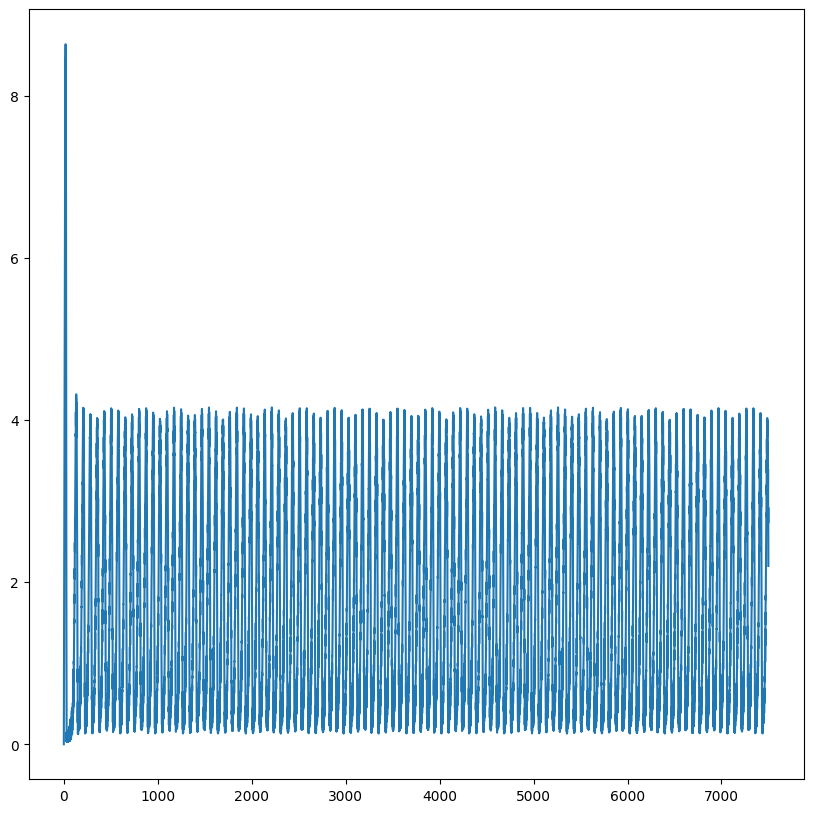

In [27]:
# Making some random graphs to see if
# it makes sense what we are doing
n_traces = len(test)
print(n_traces)
n = n_traces // 1
partitions = n_traces // n
for i in range(partitions):
    plt.figure(figsize=[10,10])
    for y in range(n):
        plt.plot(test[i*n+y])
    #plt.xlim([13000,14000])
    plt.show()

In [ ]:
# Iterating over all the label in oder to search multistability
dt = 0.002
t = len(test[0]) * dt * 20
print(t)
for key, sims in dict_sim.items():
    # Transforming aosc and Tosc back to float
    aosc = float(key.split("_")[2].split("=")[1])
    tosc = float(key.split("_")[1].split("=")[1])
    # converting values in index
    Tosc_index = int(tosc/dt/20)
    print(aosc,tosc)
    # Put here if you want to check some specific condition, otherwise True
    if True#aosc == 0.3 and tosc < 2.7: #and round(tosc,2) == 9.9:
        for a,trace_a in enumerate(sims):
            for b,trace_b in enumerate(sims):
                trace_a_norm = trace_a[11000:14000]#-np.mean(trace_a[13000:13500])
                trace_b_norm = trace_b[11000:14000]#-np.mean(trace_b[13000:13500])
                diff_2_traces = sum(abs(trace_a_norm) - abs(trace_b_norm))
                if abs(diff_2_traces) >= 4:
                    trace_a_norm = trace_a[11000+Tosc_index:14000+Tosc_index]#-np.mean(trace_a[13000+Tosc_index:13500+Tosc_index])
                    diff_2_traces = sum(abs(trace_a_norm) - abs(trace_b_norm))
                    if abs(diff_2_traces) >= 4: 
                        plt.figure(figsize=[6,3])
                        plt.plot(trace_a[11000:14000])
                        plt.plot(trace_b[11000:14000])
                        plt.title(key)
                        #plt.xlim([13000,14000])
                        plt.show()

In [ ]:
trace_a = np.sin(np.linspace(0,10*np.pi,100))
trace_b = np.sin(1+np.linspace(0,10*np.pi,100))

trace_a_norm = trace_a-np.mean(trace_a)
trace_b_norm = trace_b-np.mean(trace_b)
diff_2_traces = np.sum(abs((trace_a_norm - trace_b_norm)))
print(diff_2_traces)

plt.figure(figsize=[3,3])
plt.plot(trace_a)
plt.plot(trace_b)
plt.title(key)
plt.show()